In [1]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 3.8MB 53.4MB/s 
     |████████████████████████████████| 450kB 49.2MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
2.0.0


In [2]:
# tuples are immutable
a = (1,2,3)
a[0] = 5

TypeError: ignored

In [9]:
# python lists are mutable
a = [1,2,3]
a[0] = 5
print(a)

[5, 2, 3]


In [10]:
a = tf.Variable(5.)
b = tf.Variable(3.)
print(a*b)

tf.Tensor(15.0, shape=(), dtype=float32)


In [11]:
a = a + 1
a

<tf.Tensor: id=48, shape=(), dtype=float32, numpy=6.0>

In [12]:
c = tf.constant(4.)
print(a + b + c)

tf.Tensor(13.0, shape=(), dtype=float32)


In [0]:
# L(w) = w**2

w = tf.Variable(5.)

# calc the gradient of w

def get_loss(w):
  return w ** 2

def get_grad(w):
  with tf.GradientTape() as tape:
    L = get_loss(w)
  g = tape.gradient(L,w)
  return g

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# do the training to minimize loss

losses = []

for i in range(50):
  g = get_grad(w)
  optimizer.apply_gradients(zip([g], [w]))
  # in most general case we might have multiple gradients and multiple corresponding vars, expressed as lists
  # e.g g = [g1,g2,g3] and w = [w1,w2,w3]
  # the correct way to pass them into apply_gradients is as a list of tuples [(g1,w1),(g2,w2),(g3,w3)]
  losses.append(get_loss(w))

Final loss: 5.0925916816879635e-09


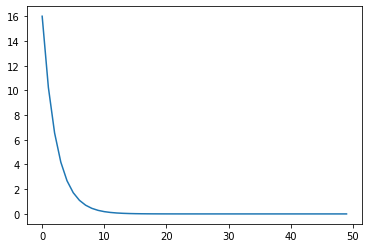

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
print(f"Final loss: {get_loss(w)}")


In [0]:
w = tf.Variable(5.)
losses2 = []

for i in range(50):
  w.assign(w - 0.1 * 2 * w) # we do the optimizer callculation
  losses2.append(w ** 2)

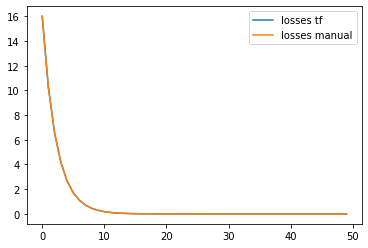

In [19]:
plt.plot(losses,label="losses tf")
plt.plot(losses2, label="losses manual")
plt.legend()